In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('ToyotaCorolla_MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df.corr(numeric_only=True)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


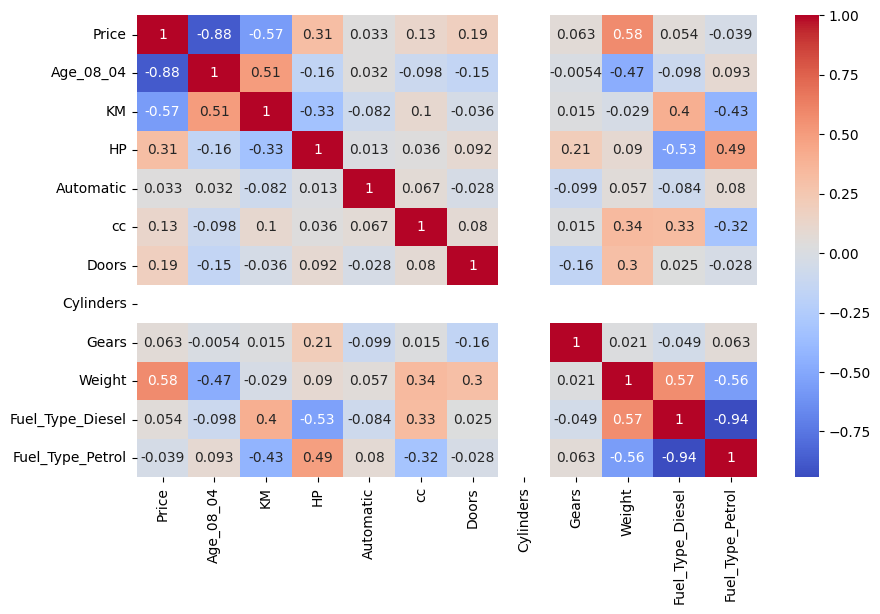

In [6]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
corr_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- PRICE has a strong negative correlation with AGE (-0.88) and KM (-0.57), indicating that older and high milage cars are generally prices lower.

- PRICE has a stong positive correlation with WEIGHT (0.58) and HP (0.31), indicating more powerful and heavier cars tend to be priced higher.

#### Model using all the Independent Variables

In [7]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol', data=df).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:13:36   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -9861.0292   1529.450     -6.447      0.000   -1.29e+04   -6860.814
Fuel_Type_Diesel[T.True]   554.0543    382.722      1.448      0.148    -196.704    1304.813
Fuel_Type_Petrol[T.True]  1144.0966    338.650      3.378      0.001     479.792    1808.402
Age_08_04                 -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                          -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                          23.5270      3.575      6.581      0.000      16.515      30.539
Automatic                  300.2592    161.026      1.865      0.062     -15.614     616.133
cc                          -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors                      -30.3567     40.908     -0.742      0.458    -110.603      49.890
Gears                      622.7990    198.026      3.145      0.002     234.346    1011.252
Weight                      20.8174      1.218     17.090      0.000      18.428      23.207
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Testing the model without using Automatic Feature

In [9]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol', data=df).fit()

In [10]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1012.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:13:36   Log-Likelihood:                -12371.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1426   BIC:                         2.482e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.012e+04   1524.254     -6.642      0.000   -1.31e+04   -7134.035
Fuel_Type_Diesel[T.True]   473.4993    380.606      1.244      0.214    -273.108    1220.107
Fuel_Type_Petrol[T.True]  1154.1310    338.901      3.406      0.001     489.334    1818.928
Age_08_04                 -123.1388      2.611    -47.160      0.000    -128.261    -118.017
KM                          -0.0177      0.001    -13.266      0.000      -0.020      -0.015
HP                          22.5698      3.541      6.374      0.000      15.624      29.516
cc                          -0.0372      0.092     -0.406      0.685      -0.217       0.143
Doors                      -38.8579     40.689     -0.955      0.340    -118.674      40.958
Gears                      585.4895    197.183      2.969      0.003     198.689     972.290
Weight                      21.3239      1.188     17.942      0.000      18.993      23.655
==============================================================================
Omnibus:                      285.390   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3139.444
Skew:                          -0.587   Prob(JB):                         0.00
Kurtosis:                      10.148   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### An automatic independent variable is not necessary.¶

#### Testing the model without using CC, Doors, Automatic and Diesel Fuel Type

In [11]:
model3 = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight+Fuel_Type_Petrol', data=df).fit()

In [12]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1517.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        17:13:36   Log-Likelihood:                -12373.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.016e+04   1520.641     -6.680      0.000   -1.31e+04   -7174.785
Fuel_Type_Petrol[T.True]   783.7551    195.618      4.007      0.000     400.026    1167.484
Age_08_04                 -122.9783      2.608    -47.156      0.000    -128.094    -117.863
KM                          -0.0178      0.001    -13.406      0.000      -0.020      -0.015
HP                          20.7613      3.195      6.498      0.000      14.494      27.029
Gears                      648.1088    192.637      3.364      0.001     270.227    1025.991
Weight                      21.3819      1.063     20.109      0.000      19.296      23.468
==============================================================================
Omnibus:                      284.630   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3150.158
Skew:                          -0.582   Prob(JB):                         0.00
Kurtosis:                      10.162   Cond. No.                     3.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### If these columns are removed (Automatic, CC, Doors, Cylinders and Fuel_Type_Diesel), the model would perform exceptionally well, capturing 86.4% of the variance.

In [13]:
new_df = df.drop(columns=['Automatic', 'cc', 'Doors', 'Cylinders', 'Fuel_Type_Diesel'])
new_df.head()

,Price,Age_08_04,KM,HP,Gears,Weight,Fuel_Type_Petrol
0,13500,23,46986,90,5,1165,False
1,13750,23,72937,90,5,1165,False
2,13950,24,41711,90,5,1165,False
3,14950,26,48000,90,5,1165,False
4,13750,30,38500,90,5,1170,False


In [14]:
X = new_df.drop(columns=['Price'])
y = new_df.Price

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 6), (288, 6), (1148,), (288,))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Train RMSE: 1305.0183437337384
Test RMSE: 1483.1498814140211
Train R2: 0.8699298986526626
Test R2: 0.8351368970530647


#### The model explains 87% of Variance in the training and 83.5% of variance in the testing, indicating a strong fit.

In [18]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)


ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Lasso RMSE: {lasso_rmse}")
print(f"Lasso R2: {lasso_r2}")
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Ridge R2: {ridge_r2}")

Lasso RMSE: 1412.7016037172464
Lasso R2: 0.8504266353516247
Ridge RMSE: 1426.0122869703857
Ridge R2: 0.8475947520109042


#### Lasso Regression outperforms Ridge Regression, demonstrating a lower Root Mean Squared Error and a higher R_Square value.

### Interview Questions

##### 1. What is Normalization & Standardization and how is it helpful?

Both Normalization and Standardization are feature scaling techniques used to transform numerical data into a specific range to improve model performance.

Normalization (Min-Max Scaling)

Xnorm = (X - X.min)/(X.max - X.min)

Scales values between 0 and 1.
Standardization (Z-score Method)

Xstd = (X - mu)/ sigma

Centers data around 0 with a standard deviation of 1.

Normalization and Standardization are important as it helps models converge faster during training, also it prevents features with larger values from dominating the model which makes the model more stable and interpretable.

##### 2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to determine their individual effects.

1st Technique - Variance Inflation Factor (VIF)

2nd Technique - Using Pearson Correlation to identify and drop highly correlated feature.

3rd Technique - Ridge Regression (L2 Regularization), which adds a penalty for large coefficients, reducing multicollinearity.

4th Technique - Lasso Regression (L1 Regularization), which forces some coefficients to become zero, effectively selecting the most important features.